In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split

In [2]:
path='C:\\Users\\ADMIN\\AppData\\Roaming\\MetaQuotes\\Terminal\\D0E8209F77C8CF37AD8BF550E51FF075\\MQL5\\Files\\OIL-MN1.prn'
oil_data=pd.read_csv(path)

In [3]:
oil_data

,<DTYYYYMMDD>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,20091201,0,77.40,80.00,68.89,79.62,3744615
1,20100101,0,79.63,83.95,72.43,72.78,3905913
2,20100201,0,72.78,80.66,69.50,79.61,4871018
3,20100301,0,80.20,83.85,78.06,83.54,4989809
4,20100401,0,83.54,87.09,80.53,86.22,4468877
...,...,...,...,...,...,...,...
148,20220401,0,100.72,109.07,92.65,103.59,525347
149,20220501,0,103.48,118.70,97.24,114.01,640466
150,20220601,0,114.13,121.41,101.19,104.91,703225
151,20220701,0,104.82,109.64,88.53,97.49,996140


In [4]:
oil_data.drop(['<DTYYYYMMDD>','<TIME>'],axis=1,inplace=True)
oil_data

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,77.40,80.00,68.89,79.62,3744615
1,79.63,83.95,72.43,72.78,3905913
2,72.78,80.66,69.50,79.61,4871018
3,80.20,83.85,78.06,83.54,4989809
4,83.54,87.09,80.53,86.22,4468877
...,...,...,...,...,...
148,100.72,109.07,92.65,103.59,525347
149,103.48,118.70,97.24,114.01,640466
150,114.13,121.41,101.19,104.91,703225
151,104.82,109.64,88.53,97.49,996140


In [5]:
oil_data.rename(columns={'<OPEN>':'Open','<HIGH>':'High','<LOW>':'Low','<CLOSE>':'Close','<VOL>':'Vol'},inplace=True)
oil_data

,Open,High,Low,Close,Vol
0,77.40,80.00,68.89,79.62,3744615
1,79.63,83.95,72.43,72.78,3905913
2,72.78,80.66,69.50,79.61,4871018
3,80.20,83.85,78.06,83.54,4989809
4,83.54,87.09,80.53,86.22,4468877
...,...,...,...,...,...
148,100.72,109.07,92.65,103.59,525347
149,103.48,118.70,97.24,114.01,640466
150,114.13,121.41,101.19,104.91,703225
151,104.82,109.64,88.53,97.49,996140


In [6]:
CloseNext=np.empty((1,len(oil_data.Close)))
CloseNext.reshape(-1,1)
for i in range(len(CloseNext)):
    CloseNext[i]=0
CloseNext=CloseNext.reshape(-1,1)
CloseNext

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [7]:
ln=len(oil_data.Close)
for i in range(ln):
    if i < ln-1:
        CloseNext[i]=oil_data.Close[i+1]
    else:
        CloseNext[i]=oil_data.Close[i]
CloseNext

array([[ 72.78],
       [ 79.61],
       [ 83.54],
       [ 86.22],
       [ 75.02],
       [ 75.37],
       [ 78.99],
       [ 71.74],
       [ 79.88],
       [ 81.78],
       [ 83.8 ],
       [ 91.4 ],
       [ 92.06],
       [ 96.84],
       [107.55],
       [113.73],
       [103.14],
       [ 95.02],
       [ 97.01],
       [ 88.72],
       [ 78.75],
       [ 92.59],
       [100.56],
       [ 99.06],
       [ 98.46],
       [106.99],
       [103.25],
       [104.98],
       [ 86.58],
       [ 84.91],
       [ 88.04],
       [ 96.51],
       [ 92.12],
       [ 86.23],
       [ 89.09],
       [ 90.94],
       [ 97.55],
       [ 91.95],
       [ 97.31],
       [ 93.2 ],
       [ 91.86],
       [ 96.41],
       [104.94],
       [107.34],
       [102.09],
       [ 96.4 ],
       [ 93.36],
       [ 99.37],
       [ 97.17],
       [102.22],
       [101.2 ],
       [ 99.48],
       [102.57],
       [105.17],
       [ 97.35],
       [ 95.53],
       [ 90.95],
       [ 80.55],
       [ 67.4 

In [8]:
x=oil_data.values
y=CloseNext

In [9]:
reg=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,shuffle=True)
reg.fit(x_train,y_train)


LinearRegression()

In [10]:
y_p=reg.predict(x_test)

In [11]:
x_axis=range(len(x_test))

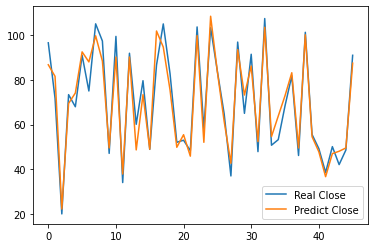

In [12]:
plt.plot(x_axis,y_test,label='Real Close')
plt.plot(x_axis,y_p,label='Predict Close')
plt.legend()

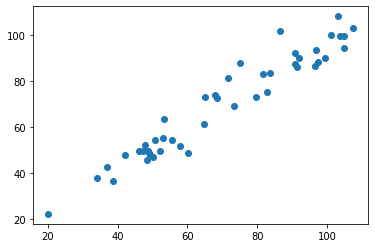

In [13]:
plt.scatter(y_test,y_p)

In [14]:
reg.score(x_test,y_test)

0.9317936884358334

In [15]:
oil_data

,Open,High,Low,Close,Vol
0,77.40,80.00,68.89,79.62,3744615
1,79.63,83.95,72.43,72.78,3905913
2,72.78,80.66,69.50,79.61,4871018
3,80.20,83.85,78.06,83.54,4989809
4,83.54,87.09,80.53,86.22,4468877
...,...,...,...,...,...
148,100.72,109.07,92.65,103.59,525347
149,103.48,118.70,97.24,114.01,640466
150,114.13,121.41,101.19,104.91,703225
151,104.82,109.64,88.53,97.49,996140


In [16]:
oil_data.corr()

,Open,High,Low,Close,Vol
Open,1.000000,0.982959,0.976365,0.959946,0.329664
High,0.982959,1.000000,0.976034,0.977718,0.340163
Low,0.976365,0.976034,1.000000,0.986103,0.297638
Close,0.959946,0.977718,0.986103,1.000000,0.340733
Vol,0.329664,0.340163,0.297638,0.340733,1.000000


array([[<AxesSubplot:xlabel='Open', ylabel='Open'>,
        <AxesSubplot:xlabel='High', ylabel='Open'>,
        <AxesSubplot:xlabel='Low', ylabel='Open'>,
        <AxesSubplot:xlabel='Close', ylabel='Open'>,
        <AxesSubplot:xlabel='Vol', ylabel='Open'>],
       [<AxesSubplot:xlabel='Open', ylabel='High'>,
        <AxesSubplot:xlabel='High', ylabel='High'>,
        <AxesSubplot:xlabel='Low', ylabel='High'>,
        <AxesSubplot:xlabel='Close', ylabel='High'>,
        <AxesSubplot:xlabel='Vol', ylabel='High'>],
       [<AxesSubplot:xlabel='Open', ylabel='Low'>,
        <AxesSubplot:xlabel='High', ylabel='Low'>,
        <AxesSubplot:xlabel='Low', ylabel='Low'>,
        <AxesSubplot:xlabel='Close', ylabel='Low'>,
        <AxesSubplot:xlabel='Vol', ylabel='Low'>],
       [<AxesSubplot:xlabel='Open', ylabel='Close'>,
        <AxesSubplot:xlabel='High', ylabel='Close'>,
        <AxesSubplot:xlabel='Low', ylabel='Close'>,
        <AxesSubplot:xlabel='Close', ylabel='Close'>,
        <Axes

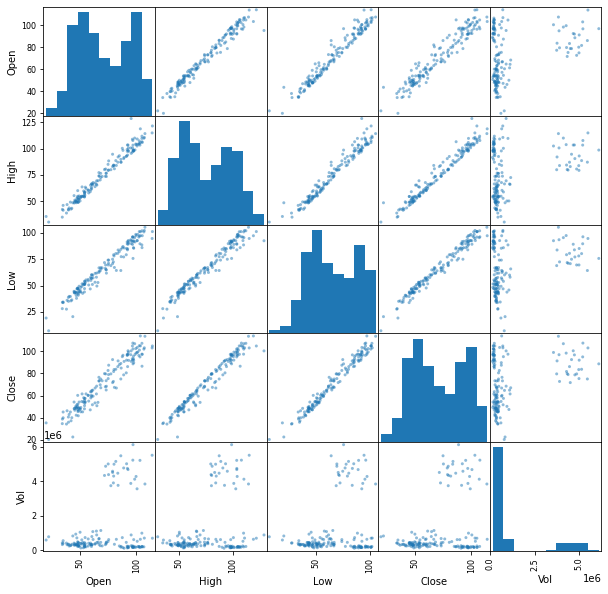

In [17]:
pd.plotting.scatter_matrix(oil_data,figsize=(10,10))